In [96]:
import h5py
import os
import numpy as np
import matplotlib.pyplot as plt

In [102]:
tf1 ='/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/Run239_snippet/tracker/1688767420_L1.h5'
tf2 ='/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/Run239_snippet/tracker/1688765618_L1.h5'

In [103]:
f1 = h5py.File(tf1,'r')
f2 = h5py.File(tf2,'r')

In [104]:
f1.keys()

<KeysViewHDF5 ['layer00', 'layer01', 'layer02', 'layer03', 'layer04', 'layer05', 'layer06', 'layer07', 'layer08', 'layer09']>

In [105]:
syncin = f1['layer00/data/sync_index'][...]
evtid = f1['layer00/data/event_id'][...][syncin]
syncin.shape, evtid.shape, f1['layer00/data/event_id']

((57311,), (57311,), <HDF5 dataset "event_id": shape (549163,), type "<u4">)

In [106]:
syncin = f1['layer01/data/sync_index'][...]
evtid = f1['layer01/data/event_id'][...][syncin]
syncin.shape, evtid.shape, f1['layer01/data/event_id']

((57311,), (57311,), <HDF5 dataset "event_id": shape (549272,), type "<u4">)

In [107]:
evtid[1], evtid[-1]

(2147550973, 2147608370)

# 2nd File

In [108]:
syncin = f2['layer00/data/sync_index'][...]
evtid = f2['layer00/data/event_id'][...][syncin]
syncin.shape, evtid.shape, f2['layer00/data/event_id']

((49028,), (49028,), <HDF5 dataset "event_id": shape (448920,), type "<u4">)

In [109]:
syncin = f2['layer01/data/sync_index'][...]
evtid = f2['layer01/data/event_id'][...][syncin]
syncin.shape, evtid.shape, f2['layer01/data/event_id']

((49028,), (49028,), <HDF5 dataset "event_id": shape (449042,), type "<u4">)

In [110]:
evtid[1], evtid[-1]

(2147501817, 2147550897)

## check each file further

In [111]:
sf1 ='/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run240/2nd_hour_qlook/1688833695.CUD.h5'
sf2 ='/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run240/2nd_hour_qlook/1688831895.CUD.h5'

In [112]:
s1 = h5py.File(sf1,'r')
s2 = h5py.File(sf2,'r')

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/Users/swasti/Library/CloudStorage/Box-Box/ComPair/all_data/run240/2nd_hour_qlook/1688833695.CUD.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [113]:
s1.keys()

<KeysViewHDF5 ['Events']>

In [114]:
s1['Events/TKR/EventTime']

<HDF5 dataset "EventTime": shape (20138,), type "<u8">

In [115]:
trk_nrg = s1["Events/TKR/Energy"][...]
trk_nr_id =trk_nrg[:,0]   # Tracker ID from the energy dataset 

Tracker time is with event id,
tracker energy is with tracker nrg event id.
So we need a new event time that is aligned with tracker nrg event id.

get n

In [116]:
a,b,c = np.intersect1d(trk_nr_id,s1['Events/TKR/EventID'][...],return_indices=True)
a

array([2.14895453e+09, 2.14895453e+09, 2.14895453e+09, ...,
       2.14897469e+09, 2.14897469e+09, 2.14897469e+09])

In [117]:
trk_nr_id[b[0]],s1['Events/TKR/EventID'][...][c[0]]

(2148954529.0, 2148954529)

In [85]:
s1['Events/TKR/EventID'][...].shape

(20138,)

In [86]:
trk_nr_id.shape

(23427,)

In [87]:
a.shape

(10553,)

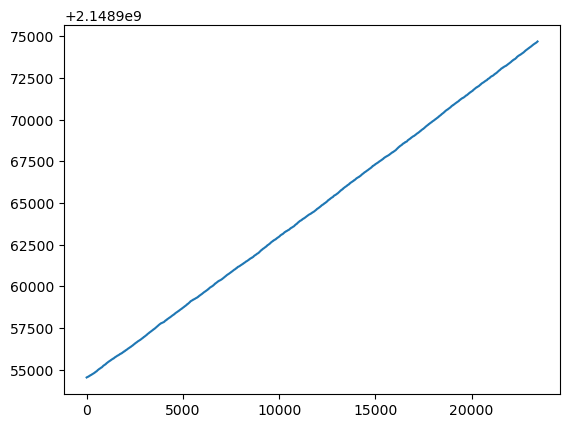

In [62]:
plt.plot (trk_nr_id)

In [66]:
czt_evt= s1['Events/CZT/EventID'][...]
csi_evt= s1['Events/CsI/EventID/EventID'][...]

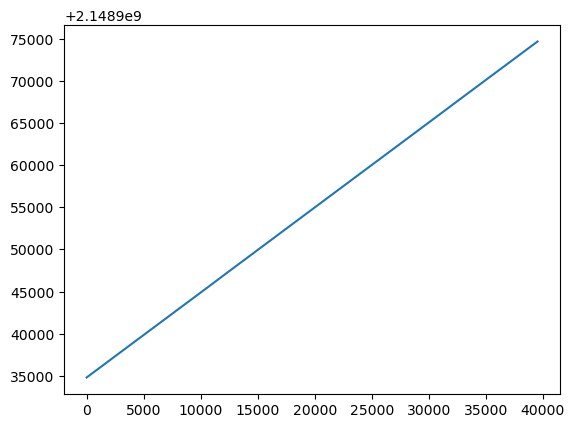

In [72]:
czt_evt=czt_evt[np.where(czt_evt>0)]
plt.plot(czt_evt)

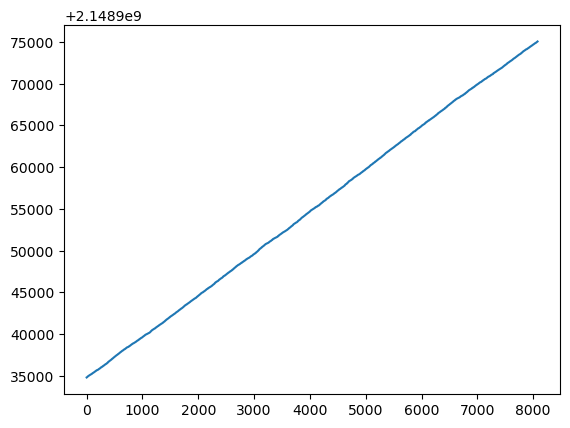

In [69]:
plt.plot(csi_evt)